In [1]:
import pandas as pd

In [2]:
dataset =pd.read_csv("Titanic-Dataset.csv")

In [3]:
df =pd.DataFrame(dataset)

In [4]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
y =df["Survived"]

In [34]:
x= df[ ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch',  'Fare', 'Cabin', 'Embarked'
      ]]

In [23]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,25.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [8]:
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

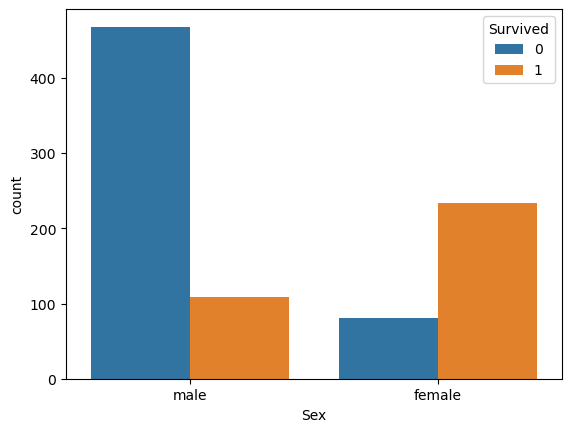

In [9]:
sns.countplot(data= df,x="Sex", hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

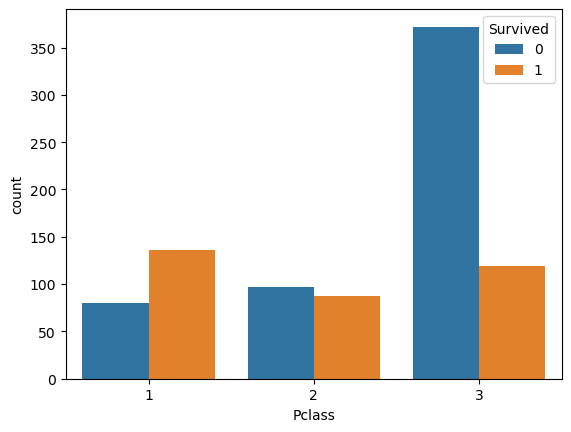

In [10]:
sns.countplot(data= df,x="Pclass", hue="Survived")

<Axes: xlabel='Cabin', ylabel='count'>

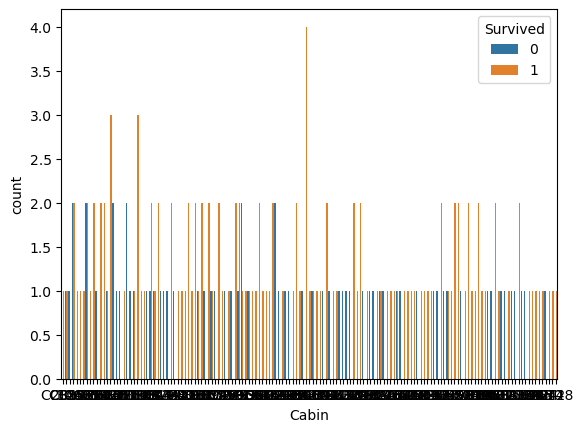

In [11]:
sns.countplot(data= df,x="Cabin", hue="Survived")

<Axes: >

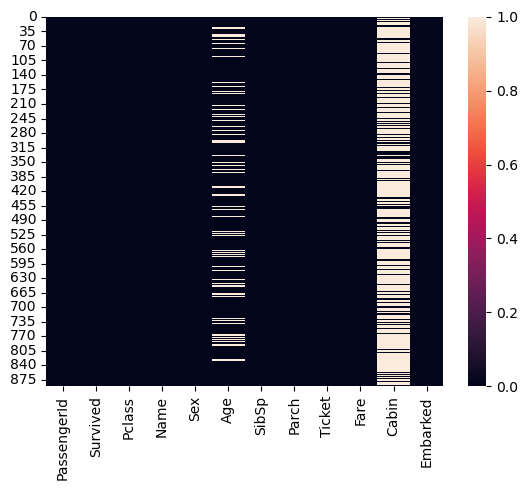

In [12]:
sns.heatmap(df.isnull())

In [13]:
# remove the cabin because missing data set
x= df[ ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch',  'Fare',  'Embarked'
      ]]

In [15]:
df.isnull().sum(0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#fill the data of age on base Pclass 1
age1 =int(x[x['Pclass'] ==1]['Age'].mean())

age1

38

In [17]:
#fill the data of age on base Pclass 2
age2 =int(x[x['Pclass'] ==2]['Age'].mean())

age2

29

In [18]:
#fill the data of age on base Pclass 3
age3 =int(x[x['Pclass'] ==3]['Age'].mean())

age3

25

In [19]:
# Function to fill missing age
def fill_age(row):
    if pd.isnull(row['Age']):
        if row['Pclass'] == 1:
            return age1
        elif row['Pclass'] == 2:
            return age2
        else:
            return age3
    else:
        return row['Age']

# Apply the function to the DataFrame
x['Age'] = x.apply(fill_age, axis=1)

# Check missing values again
print("Missing Age values:", x['Age'].isnull().sum())


Missing Age values: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_5564\1945513616.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'] = x.apply(fill_age, axis=1)


In [20]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,25.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C
